In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (9, 9)
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 1.5*plt.rcParams['font.size']
plt.rcParams['legend.fontsize'] = plt.rcParams['font.size']
plt.rcParams['xtick.labelsize'] = plt.rcParams['font.size']
plt.rcParams['ytick.labelsize'] = plt.rcParams['font.size']
plt.rcParams['lines.markersize'] =8

%matplotlib inline

In [102]:
site_data = pd.DataFrame.from_csv('/users/ryan/downloads/USCS_1999_2012_ASCII/BYSITE.TXT', sep='|', index_col=None)
mortality = site_data[site_data['EVENT_TYPE']=='Mortality']
mortality = mortality[mortality['CRUDE_RATE']!='~']
mortality = mortality[mortality['CRUDE_RATE']!='.']
mortality = mortality[mortality['SEX']=='Male and Female']
mortality[['AGE_ADJUSTED_RATE','CRUDE_RATE']] = mortality[['AGE_ADJUSTED_RATE','CRUDE_RATE']].astype(float)


incidence = site_data[site_data['EVENT_TYPE']=='Incidence']
incidence = incidence[incidence['CRUDE_RATE']!='~']
incidence = incidence[incidence['SEX']=='Male and Female']
incidence[['AGE_ADJUSTED_RATE','CRUDE_RATE']] = incidence[['AGE_ADJUSTED_RATE','CRUDE_RATE']].astype(float)

print incidence.shape
incidence[1:10]
mortality[1:10]

(6860, 13)


,YEAR,RACE,SEX,SITE,EVENT_TYPE,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,COUNT,POPULATION,CRUDE_CI_LOWER,CRUDE_CI_UPPER,CRUDE_RATE
4248,2000,All Races,Male and Female,Acute Lymphocytic,Mortality,0.5,0.5,0.5,1395,282162411,0.5,0.5,0.5
4250,2001,All Races,Male and Female,Acute Lymphocytic,Mortality,0.5,0.5,0.5,1433,284968955,0.5,0.5,0.5
4252,2002,All Races,Male and Female,Acute Lymphocytic,Mortality,0.5,0.5,0.5,1432,287625193,0.5,0.5,0.5
4254,2003,All Races,Male and Female,Acute Lymphocytic,Mortality,0.5,0.5,0.5,1429,290107933,0.5,0.5,0.5
4256,2004,All Races,Male and Female,Acute Lymphocytic,Mortality,0.4,0.5,0.5,1371,292805298,0.4,0.5,0.5
4258,2005,All Races,Male and Female,Acute Lymphocytic,Mortality,0.5,0.5,0.5,1460,295516599,0.5,0.5,0.5
4260,2006,All Races,Male and Female,Acute Lymphocytic,Mortality,0.4,0.5,0.5,1393,298379912,0.4,0.5,0.5
4262,2007,All Races,Male and Female,Acute Lymphocytic,Mortality,0.4,0.5,0.5,1418,301231207,0.4,0.5,0.5
4264,2008,All Races,Male and Female,Acute Lymphocytic,Mortality,0.4,0.5,0.5,1424,304093966,0.4,0.5,0.5


In [87]:

organ_incidence = incidence.groupby('SITE')['CRUDE_RATE'].mean()

organ_incidence.sort()
organ_incidence


SITE
Pleura                                               0.000000
Other Male Genital Organs                            0.168254
Trachea, Mediastinum and Other Respiratory Organs    0.177778
Other Urinary Organs                                 0.226027
Other Oral Cavity and Pharynx                        0.267187
Retroperitoneum                                      0.327632
Other Digestive Organs                               0.343421
Cranial Nerves and Other Nervous System              0.383117
Ureter                                               0.386842
Oropharynx                                           0.402857
Peritoneum, Omentum and Mesentery                    0.415789
Lip                                                  0.468750
Floor of Mouth                                       0.488462
Kaposi Sarcoma                                       0.497368
Eye and Orbit                                        0.543590
...
Corpus                                18.621111
Corpus and Ut

In [103]:
incidence_2012 = incidence[incidence['YEAR'] =='2012']
mortality_2012 = mortality[mortality['YEAR'] =='2012']

organ_incidence_2012 = incidence_2012.groupby('SITE')['CRUDE_RATE'].mean()
organ_mortality_2012 = mortality_2012.groupby('SITE')['CRUDE_RATE'].mean()

# organ_incidence_2012.sort()
# organ_mortality_2012.sort()



In [104]:
print organ_incidence_2012.shape
print organ_mortality_2012.shape
incidence_mort = pd.concat([organ_incidence_2012, organ_mortality_2012], axis=1)
incidence_mort.columns = ['Incidence per 100,000','Mortality per 100,000']
print incidence_mort.shape
incidence_mort


(81,)
(76,)
(81, 2)


,"Incidence per 100,000","Mortality per 100,000"
Acute Lymphocytic,1.516667,0.420000
Acute Myeloid,3.233333,2.016667
All Cancer Sites Combined,342.200000,126.566667
All Sites (comparable to ICD-O-2),337.316667,NaN
"Anus, Anal Canal and Anorectum",1.333333,0.225000
Bones and Joints,0.733333,0.360000
Brain,4.383333,NaN
Brain and Other Nervous System,4.716667,3.000000
Cervix,7.166667,2.350000
Chronic Lymphocytic,2.633333,0.880000


In [200]:
drug_dev = {
'Urinary Bladder' : 18,
'Brain and Other Nervous System' : 47,
'Female Breast' : 73,
'Colon and Rectum' : 46,
'Oral Cavity and Pharynx' : 19,
'Kidney and Renal Pelvis' : 24,
'Leukemias' : 87,
'Liver and Intrahepatic Bile Duct' : 37,
'Lung and Bronchus' : 98,
'Lymphomas' : 78,
'Myeloma' : 33,
'Ovary' : 48,
'Pancreas' : 39,
'Prostate' : 45,
'Skin excluding Basal and Squamous' : 56,
'Stomach' : 24, }

drugs = pd.Series(drug_dev)

inc_mort_drugs = pd.merge(incidence_mort, pd.DataFrame(drugs), right_index=True, left_index=True)
inc_mort_drugs.rename(columns = {0:'Drugs in Development'}, inplace = True)

In [91]:
print inc_mort_drugs.shape
inc_mort_drugs.columns

(17, 3)


Index([u'Incidence per 100,000', u'Mortality per 100,000', u'Drugs in Development'], dtype='object')

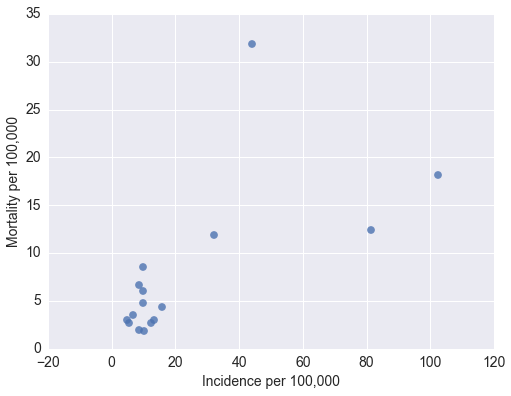

In [201]:
plt.figure(figsize=(8,6))
sns.regplot('Incidence per 100,000', 'Mortality per 100,000', data=inc_mort_drugs, fit_reg=False, scatter_kws={'s':60})

# for label, x, y in zip(inc_mort_drugs.index.tolist(), inc_mort_drugs['Incidence per 100,000'], inc_mort_drugs['Mortality per 100,000']):
#     plt.annotate(
#         label, 
#         xy = (x, y), xytext = ((np.random.rand(1)-.5)*100, (np.random.rand(1)-.5)*300),
#         textcoords = 'offset points', ha = 'right', va = 'bottom',
# #         bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
#         arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

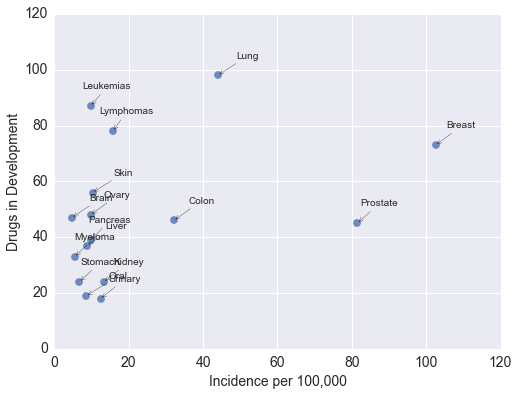

In [202]:
plt.figure(figsize=(8,6))
sns.regplot('Incidence per 100,000', 'Drugs in Development', data=inc_mort_drugs, fit_reg=False, scatter_kws={'s':60})
plt.axis((0, 120, 0, 120))
labels = []
for i in inc_mort_drugs.index.tolist():
    if i == 'Female Breast':
        labels.append('Breast')
    else:
        labels.append(i.split()[0])

for label, x, y in zip(labels, \
                       inc_mort_drugs['Incidence per 100,000'], \
                       inc_mort_drugs['Drugs in Development']):
    plt.annotate(label, xy = (x, y), xytext = (40, 15),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

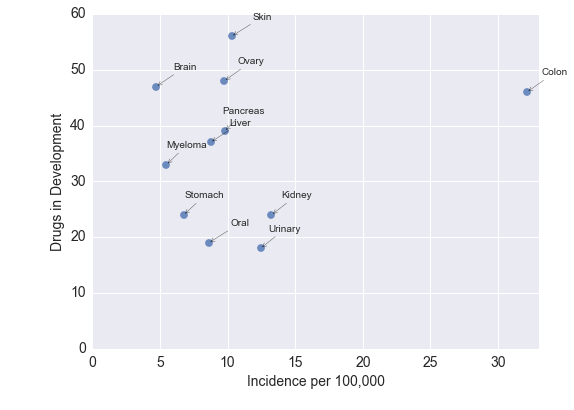

In [203]:
plt.figure(figsize=(8,6))
sns.regplot('Incidence per 100,000', 'Drugs in Development', data=inc_mort_drugs, fit_reg=False, scatter_kws={'s':60})
plt.axis((0, 33, 0, 60))

for label, x, y in zip(labels, \
                       inc_mort_drugs['Incidence per 100,000'], \
                       inc_mort_drugs['Drugs in Development']):
    plt.annotate(label, xy = (x, y), xytext = (40, 15),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [205]:
inc_mort_drugs['Disease Severity'] = (inc_mort_drugs['Mortality per 100,000']/inc_mort_drugs['Incidence per 100,000'] )

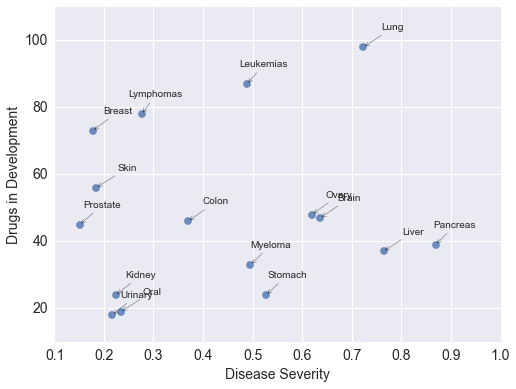

In [206]:
plt.figure(figsize=(8,6))
sns.regplot('Disease Severity', 'Drugs in Development', data=inc_mort_drugs, fit_reg=False, scatter_kws={'s':60})

for label, x, y in zip(labels, \
                       inc_mort_drugs['Disease Severity'], \
                       inc_mort_drugs['Drugs in Development']):
    plt.annotate(label, xy = (x, y), xytext = (40, 15),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [211]:
counter=0
with open('/users/ryan/downloads/1585-E_sequence_short-len-q.fastq') as f:
    with open('/users/ryan/downloads/test_seqs2.fastq', 'w') as of:
        for line in f:
            counter+=1
            if counter<400001:
                of.write(line)
            